# Linear Regression
The LinearRegression class in sklearn.linear_model implements Ordinary Least Squares (OLS) regression, fitting a linear model to minimize the residual sum of squares between observed target values and the predicted target values.

In [1]:
import numpy as np
import pandas as pd

In [2]:
class Linear_Regression:
    def __init__(self,lr=0.001,n_iters=10000):
        self.lr=lr
        self.n_iters=n_iters
        self.weights=None
        self.bias=None

    def fit(self,X,y):
        self.n_samples,self.n_features=X.shape
        self.weights=np.zeros(self.n_features)
        self.bias=0
        for i in range(self.n_iters):
            y_pred=np.dot(X,self.weights)+self.bias
            dw=(1.0/self.n_samples)*np.dot(X.T,(y_pred-y))
            db=(1.0/self.n_samples)*np.sum(y_pred-y)
            self.weights=self.weights-(self.lr*dw)
            self.bias=self.bias-(self.lr*db)

    def predict(self,X):
        y_predict=np.dot(X,self.weights)+self.bias
        return y_predict

In [3]:
raw_df = pd.read_csv("placement.csv")
data = raw_df[["cgpa"]]
target = raw_df["package"]

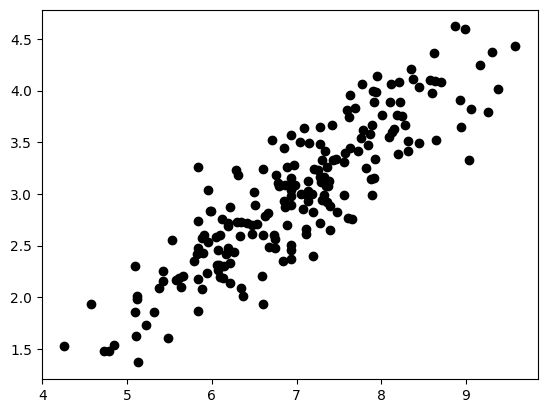

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data,target,color="black")

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=1234)

In [6]:
print(X_train.shape,X_test.shape,y_train.shape)

(160, 1) (40, 1) (160,)


In [7]:
lr1=Linear_Regression()
lr1.fit(X_train,y_train)
predictions1=lr1.predict(X_test)

In [8]:
lr1.weights

array([0.45342664])

In [9]:
lr1.bias

-0.16487423394653633

In [10]:
predictions1

array([3.10433184, 2.76879613, 3.50788155, 3.74819767, 3.98851379,
       3.26303116, 3.41266195, 2.89575558, 3.06352344, 3.35371649,
       2.90028985, 2.94563252, 2.16120443, 2.72345346, 2.97737238,
       3.00004371, 2.51487721, 3.07712624, 2.94109825, 3.28116823,
       3.07259197, 2.87761852, 3.51241581, 4.03385645, 3.41719622,
       2.29269815, 3.60310114, 2.39245201, 3.15874304, 4.08826765,
       2.88668705, 1.90728551, 2.6917136 , 2.48313734, 2.14760163,
       2.34257508, 2.91389265, 3.1360717 , 2.65543947, 2.97283811])

In [11]:
mse=sum((predictions1-y_test)**2)

In [12]:
mse

4.634016117707481

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
predictions

array([3.1125252 , 2.68194848, 3.63038097, 3.938767  , 4.24715303,
       3.31617634, 3.50819029, 2.8448694 , 3.06015776, 3.43254843,
       2.850688  , 2.90887405, 1.90225551, 2.62376244, 2.94960428,
       2.9786973 , 2.35610664, 3.07761357, 2.90305544, 3.33945076,
       3.07179497, 2.82159498, 3.63619958, 4.30533907, 3.51400889,
       2.07099503, 3.75257166, 2.19900433, 3.18234845, 4.37516232,
       2.83323219, 1.57641367, 2.58303221, 2.31537641, 1.8847997 ,
       2.13499968, 2.86814382, 3.15325542, 2.53648337, 2.94378567])

## Key Parameters:
- fit_intercept (bool, default=True): Determines whether to calculate the intercept. If set to False, the data is expected to be centered, and no intercept is used.
- copy_X (bool, default=True): Specifies whether the training data X is copied. If set to False, it may overwrite the input data.
- n_jobs (int, default=None): Specifies the number of jobs (parallel computations) used in the training. None means using one processor, while -1 uses all available processors.
- positive (bool, default=False): Ensures that the coefficients are positive. This option is only applicable for dense input arrays.

## Attributes:
- coef_: Coefficients of the features in the linear model. It’s a 1D array for single-target regression and a 2D array for multi-target regression.
- intercept_: The intercept term in the model.
- rank_: The rank of the matrix X (available when X is dense).
- singular_: Singular values of X (available when X is dense).
- n_features_in_: The number of features seen during model fitting.
- feature_names_in_: The names of the features seen during model fitting, defined if X has feature names.

## Methods:
- fit(X, y): Fits the linear model to the training data X and target values y.
- predict(X): Predicts target values for given input data X based on the fitted model.
- score(X, y): Returns the coefficient of determination R2(R square) of the prediction, indicating the model’s accuracy.
- get_params(): Returns the parameters of the estimator.
- set_params(): Sets the parameters of the estimator.

In [15]:
sum((predictions-y_test)**2)

4.607371945475401

In [16]:
lr.coef_

array([0.58186043])

In [17]:
lr.intercept_

-1.0826884800991223

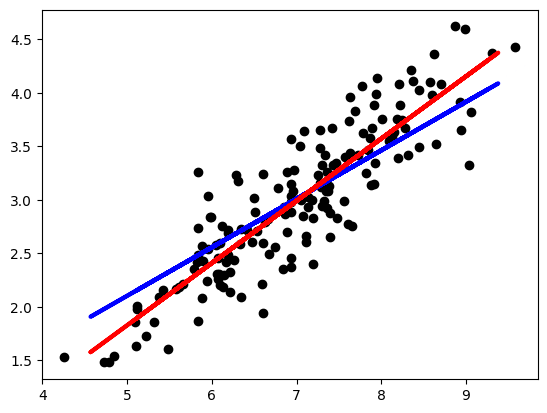

In [18]:
plt.scatter(X_train,y_train,color="black")
plt.plot(X_test,predictions1,color="blue",linewidth=3)
plt.plot(X_test,predictions,color="red",linewidth=3)

### Example: python
import numpy as np<br>
from sklearn.linear_model import LinearRegression

#### Input data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])<br>
y = np.dot(X, np.array([1, 2])) + 3  # y = 1 * x0 + 2 * x1 + 3

#### Linear Regression model
reg = LinearRegression().fit(X, y)

#### Get model parameters
print(reg.coef_)        # Output: array([1., 2.])<br>
print(reg.intercept_)    # Output: 3.0

#### Predict for new data
print(reg.predict(np.array([[3, 5]])))  # Output: 16.

In [19]:
from sklearn import datasets
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [20]:
lr1=Linear_Regression()
lr1.fit(X_train,y_train)
predictions1=lr1.predict(X_test)

In [21]:
predictions1

array([  90.07601829,   65.22031659,  -45.69254375,  -82.48773386,
         20.93882428,  -73.92154227,  -14.9088067 ,  151.65238413,
         14.01724794, -102.29086363,   15.56845768,   41.60336302,
         26.20270783,   38.12027319,   37.38265591,  -37.35613451,
        -83.12287222,   26.30375187,   38.13085076,   29.45249968])

In [22]:
sum((predictions1-y_test)**2)

6115.437585465633

In [23]:
lr=LinearRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
predictions

array([  90.07911876,   65.22240306,  -45.69498196,  -82.49167314,
         20.9391043 ,  -73.92513208,  -14.90998909,  151.6579966 ,
         14.01724558, -102.29561077,   15.56851861,   41.60448604,
         26.20320259,   38.12125412,   37.38360675,  -37.35823263,
        -83.1268374 ,   26.30425075,   38.13183212,   29.45312701])

In [24]:
sum((predictions-y_test)**2)

6115.482632457284

In [25]:
y_test

array([  89.5978923 ,   33.21708479,  -58.51318402,  -82.91713341,
         40.69772522, -100.73717846,   -1.65856494,  163.94385144,
          5.26394625,  -77.78704394,    9.20267903,   36.86598297,
         -5.54348338,   31.43120085,   64.53968736,  -44.1299115 ,
        -74.76820338,   50.92876904,   28.14443518,   17.68768961])

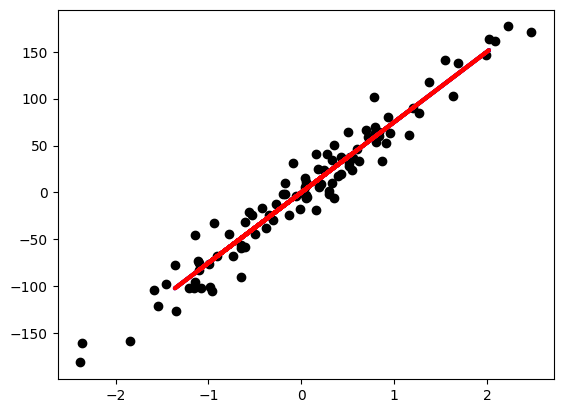

In [26]:
plt.scatter(X,y,color="black")
plt.plot(X_test,predictions1,color="blue",linewidth=3)
plt.plot(X_test,predictions,color="red",linewidth=3)